**"Titanic Survival Prediction Model – A Perfect Starting Point!"**  
In this project, we’ll use the famous Titanic dataset to build a model that predicts whether a passenger survived the Titanic disaster or not. The dataset contains important details like the passenger's age, gender, ticket class, fare, and cabin information. Using these features, we will create a machine learning model to make accurate predictions. This project is a great way for beginners to learn data analysis, preprocessing, and classification. Let's dive into the world of data science and take a step ahead in mastering these concepts!"

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings
import sys
import os
import logging
logging.disable(sys.maxsize) 

> Pandas: For data manipulation and analysis.

> NumPy: For numerical computations.

> Seaborn and Matplotlib: For data visualization.

> Scikit-learn: For machine learning algorithms and metrics.

> Warnings: To suppress warning messages, keeping your output cleaner.

> Logging: To suppress logging messages, if any are generated during your code execution.

#### Check Your Environment
- After importing, it's good practice to check if the libraries are correctly imported and the versions are as expected.

In [ ]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", plt.__version__)
print("Scikit-learn version:", train_test_split.__module__.split('.')[0])

we can include this block at the beginning of our code to confirm everything is set up properly.

### Loading The Titanic Dataset 

In [4]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


we can check the overall structure of the DataFrame, including the number of rows and columns, and the data types of each column:

In [5]:
# Get a concise summary of the DataFrame
print(titanic_data.info())

# Display the shape of the DataFrame (rows, columns)
print("Shape of the dataset:", titanic_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Shape of the dataset: (891, 12)


we should understand what each column represents. 

- PassengerId: Unique identifier for each passenger.
- Survived: Survival status (0 = No, 1 = Yes).
- Pclass: Ticket class (1 = First, 2 = Second, 3 = Third).
- Name: Name of the passenger.
- Sex: Gender of the passenger.
- Age: Age of the passenger in years.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Ticket: Ticket number.
- Fare: Fare paid by the passenger.
- Cabin: Cabin number (if available).
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

## Exploratory Data Analysis (EDA)

To better understand the dataset, we can perform some exploratory data analysis. 

#### 1. Summary Statistics
> Get summary statistics for numerical columns to understand the distribution:

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2. Check for Missing Values
> Identify if there are any missing values in the dataset:

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3. Data Visualization
> we can visualize the data to better understand relationships and distributions. For example, you might want to visualize the distribution of age:

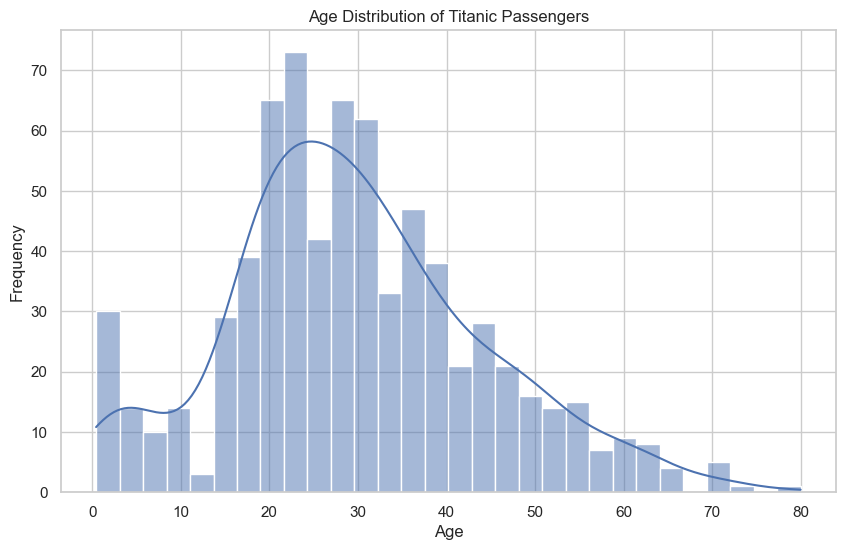

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### 4. Analyze Survival Rates
> we can analyze survival rates based on different features, such as gender and passenger class:

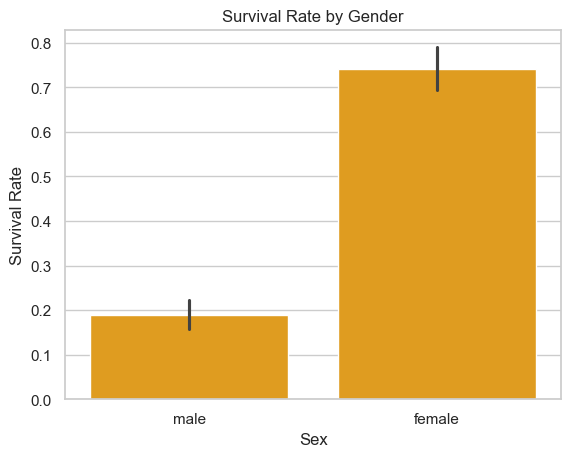

In [12]:
sns.barplot(x='Sex', y='Survived',color='orange', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

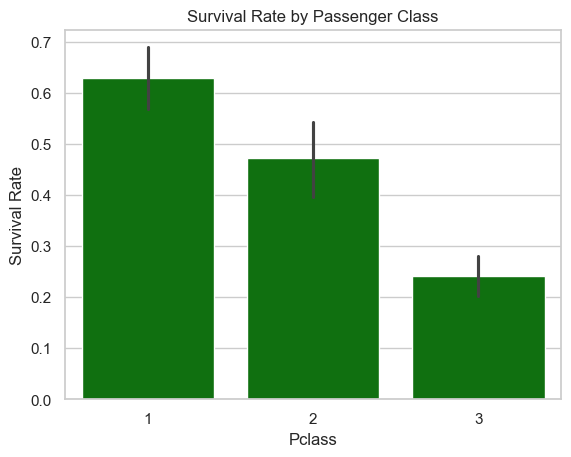

In [15]:
sns.barplot(x='Pclass', y='Survived',color='green', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

#### 5. Survival Rate by Age
> To see how age affected survival rates, we can create a visualization that shows the survival rate across different age groups:

In [16]:
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)

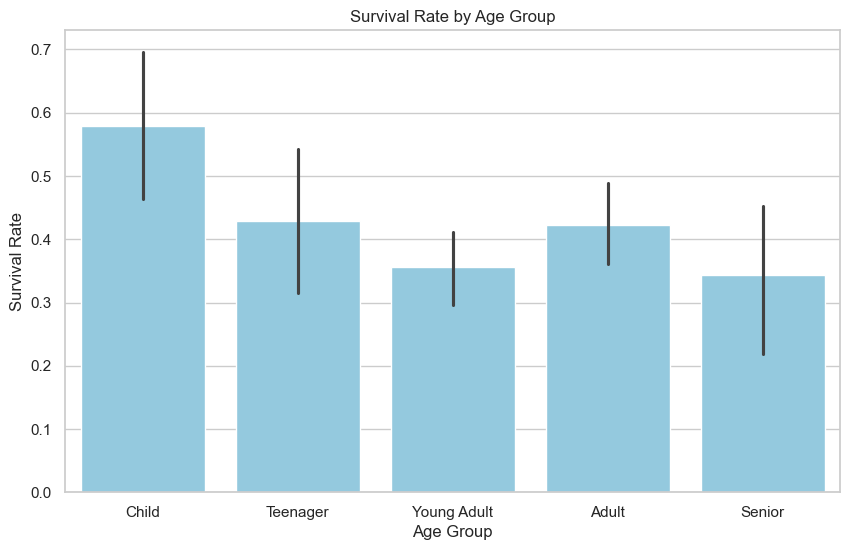

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived',color='skyblue', data=titanic_data)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

#### 6. Survival Rate by Passenger Class and Gender
> This visualization helps to understand how survival rates varied based on both passenger class and gender:

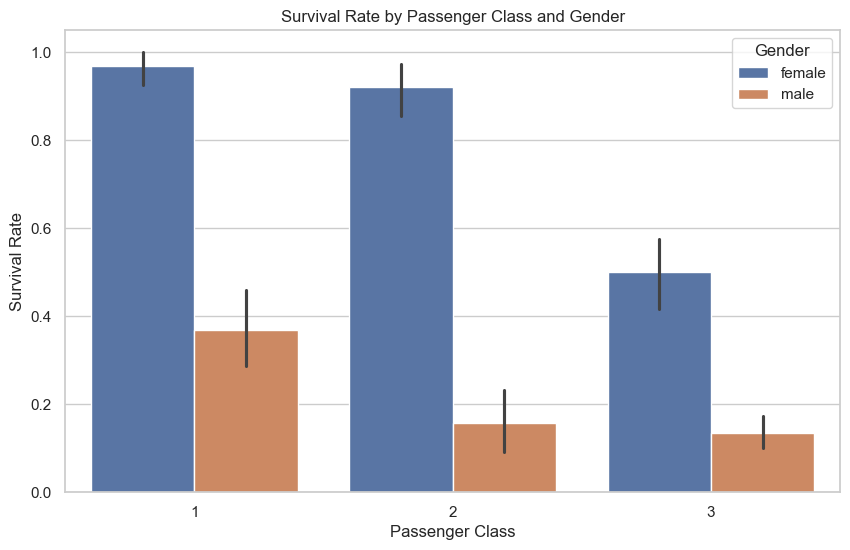

In [19]:
# Plot survival rate by passenger class and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Gender')
plt.show()

#### 7. Survival Rate by Fare
> Analyzing how the fare paid affected the survival rate can provide insights into socio-economic factors:

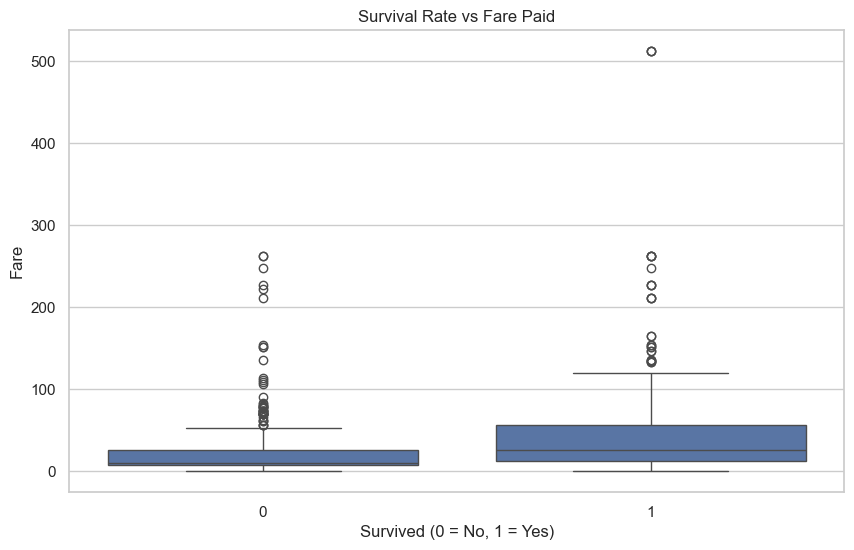

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Survival Rate vs Fare Paid')
plt.ylabel('Fare')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

#### 8.  Count of Passengers by Embarked Location
> Understanding where passengers boarded the Titanic can also provide insights:

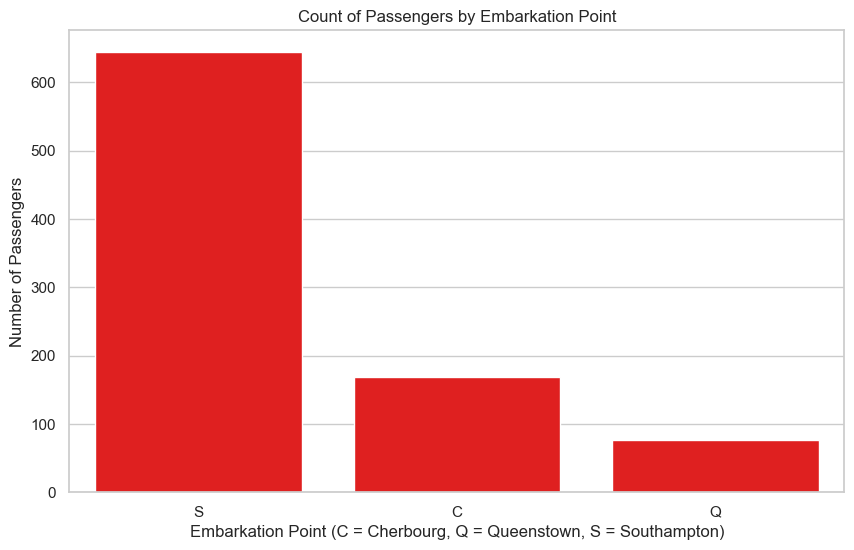

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked',color='red', data=titanic_data)
plt.title('Count of Passengers by Embarkation Point')
plt.ylabel('Number of Passengers')
plt.xlabel('Embarkation Point (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.show()

#### 9.Pairplot for Feature Relationships
> The pairplot visualizes pairwise relationships in the dataset, helping identify potential correlations:

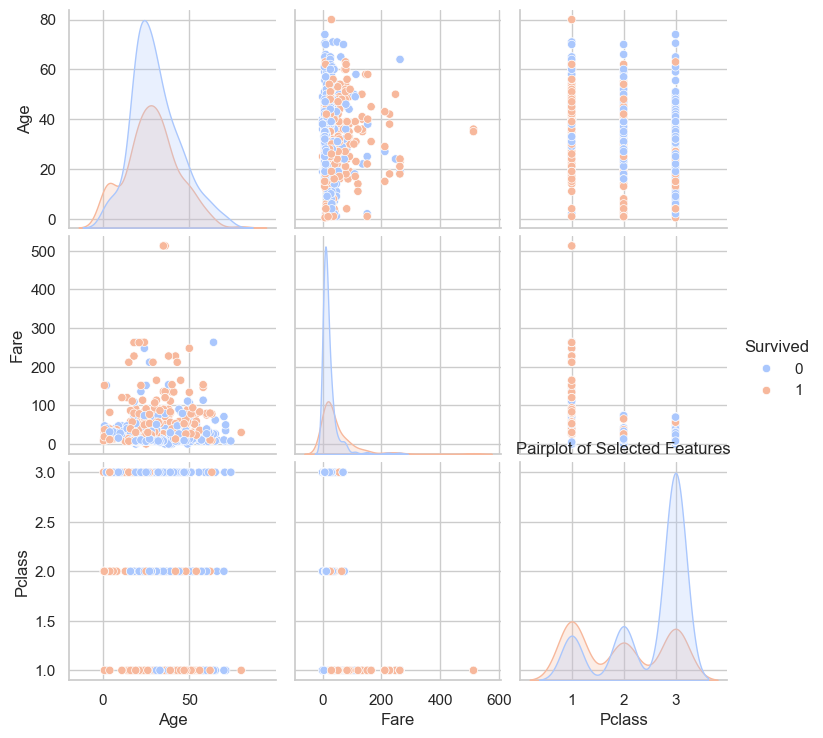

In [24]:
sns.pairplot(titanic_data, hue='Survived', vars=['Age', 'Fare', 'Pclass'], palette='coolwarm')
plt.title('Pairplot of Selected Features')
plt.show()

### Data Cleaning and Preprocessing
##### Inspecting the Data
Before cleaning, it's essential to understand the current state of the data. We can look for missing values, unique values, and general statistics:

In [25]:
print(titanic_data.isnull().sum())

# Display summary statistics
print(titanic_data.describe(include='all'))

# Show unique values in categorical features
print(titanic_data['Embarked'].unique())
print(titanic_data['Sex'].unique())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.0

### Handling Missing Values
#### The Titanic dataset has some missing values that need to be handled:

> Age: We can fill missing ages with the median age or use an interpolation method.

> Embarked: We can fill missing values with the most common embarkation point.

> Cabin: This feature has many missing values. We can drop this column since it may not add significant value.

In [26]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [27]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [28]:
titanic_data.drop(columns=['Cabin'], inplace=True)

In [29]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
AgeGroup       177
dtype: int64

Since we already handled the missing values for Age and Embarked, let’s now focus on the AgeGroup column. You can fill missing values in AgeGroup based on logical bins or by using the existing Age column to create groups. If you're categorizing Age into groups, you might want to create the AgeGroup column first, or handle it based on existing age data.

Creating Age Groups (if not created)
Let's say we want to categorize passengers into groups such as "Child," "Teenager," "Adult," and "Senior":

In [30]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)

In [31]:
titanic_data['AgeGroup'].value_counts()

AgeGroup
Adult       730
Teenager     70
Child        69
Senior       22
Name: count, dtype: int64

In [32]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

- No Missing Values: All columns, including AgeGroup, are now free of missing values.

### Feature Selection (including AgeGroup)
Now, include AgeGroup in feature selection:

In [33]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] + [col for col in titanic_data.columns if 'AgeGroup_' in col]
X = titanic_data[features]
y = titanic_data['Survived']

 ### Split the Dataset
Split  data into training and testing sets to evaluate your model's performance:

In [34]:
X = titanic_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])  # Drop irrelevant columns
y = titanic_data['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 One-Hot Encoding of Categorical Variables
Make sure to apply one-hot encoding to Sex and Embarked. Use pd.get_dummies() for this:

In [39]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

In [43]:
# Check if 'Cabin' exists in the DataFrame before dropping
if 'Cabin' in titanic_data.columns:
    titanic_data.drop(columns=['Cabin'], inplace=True)

In [44]:
print("Current DataFrame columns:", titanic_data.columns)

Current DataFrame columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'AgeGroup', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [45]:
# Drop non-numeric or irrelevant columns (excluding 'Cabin' if it doesn't exist)
columns_to_drop = ['Name', 'Ticket', 'PassengerId']  # Add more columns if needed

# Check and drop columns if they exist
for col in columns_to_drop:
    if col in titanic_data.columns:
        titanic_data.drop(columns=[col], inplace=True)

# Now proceed with the rest of your processing

Drop Irrelevant Columns
Before splitting your dataset, make sure to drop any non-numeric columns:

#### Model Selection and Training
Choose a machine learning model (like Logistic Regression, Random Forest, etc.) and train it on your training dataset: